## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1.1 Importing Data

In [2]:
path = r'C:\Users\javir\Downloads\Javis Data Analytics stuff\Achievement 4\Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merg_flag.pkl'))

## 2. Creaing Bar Charts

<AxesSubplot:>

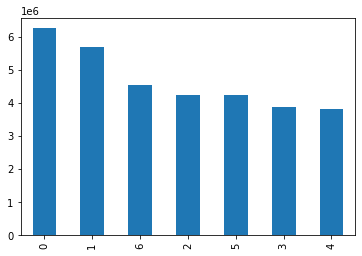

In [6]:
# creating our chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

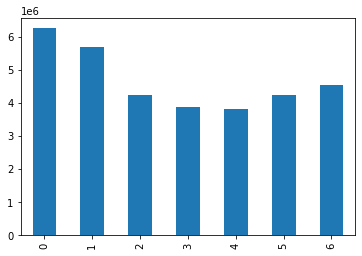

In [7]:
# Using sort_index to bypass ordering from largest to smallest
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

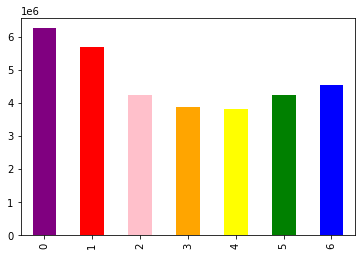

In [8]:
# Adding a Color arguement to our plot.bar()
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### Exporting Charts

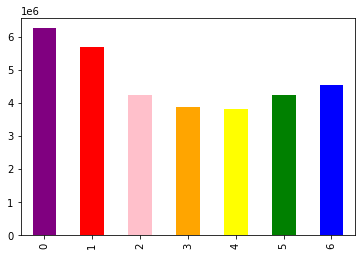

In [9]:
# We need to save the bar into Jupyter's memory
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### our chart has now been saved to 'bar' and can now be called

In [10]:
# Time to export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 3. Histograms

<AxesSubplot:ylabel='Frequency'>

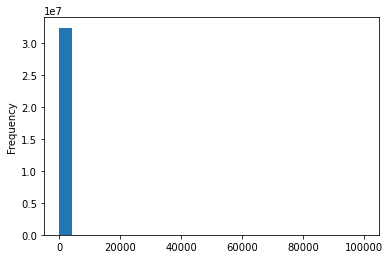

In [11]:
# Creating our histogram with are argument of bins = 25
ords_prods_merge['prices'].plot.hist(bins = 25)

#### Something isn't right, so we will check .describe()

In [12]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Our Max Value is looking strange, to further investigate we will look individually

In [13]:
ords_prods_merge['prices'].mean()

11.980225638676366

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

#### Our max value is 99,999, which doesnt make sense and could be breaking our histogram. There are many factors as to what happened ( Data coruption, Special Values, etc.) We will now conduct creating a scatterplot to reveal outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

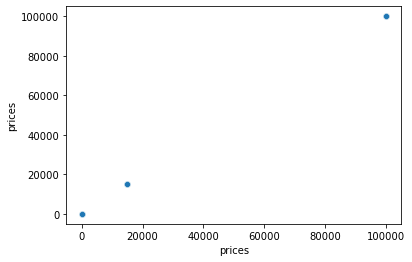

In [16]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#### We see 2 outliers, 1 by 20,000 and another by 100,000 price ranges, these are errors in our data frame and will have to be investigated, so we will ensue data checks to locate our outliers and potential reasons

In [18]:
# We have 26 columns, not all show
pd.set_option("display.max_columns", None)
# We determine that anything above $100 would be an outlier at a supermarket
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]
# Here we look for all rows above the 100 dollar price range

,order_id,user_id,evaluation_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,ordered_today,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_days_revised,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,order_frequency,frequency_flag
1592,912404,17,prior,12,2,14,5.0,False,21553.0,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Regularly busy,Most Orders,41,Loyal customer,108.648299,High spender,5.0,Non-frequent customer
1654,603376,17,prior,22,6,16,4.0,False,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Regularly busy,Most Orders,41,Loyal customer,108.648299,High spender,5.0,Non-frequent customer
16668,3264360,135,prior,2,2,21,13.0,False,21553.0,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,5,New customer,1154.792308,High spender,12.0,Frequent customer
16674,892534,135,prior,3,0,8,12.0,False,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Busiest day,Busiest days,Busiest days,Fewest Orders,5,New customer,1154.792308,High spender,12.0,Frequent customer
54053,229704,342,prior,8,1,19,30.0,False,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Busiest days,Fewest Orders,17,Regular Customer,114.426619,High spender,23.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,prior,18,1,9,7.0,False,21553.0,17.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Busiest days,Most Orders,26,Regular Customer,351.141618,High spender,6.0,Non-frequent customer
32583684,2504315,205818,prior,3,5,15,3.0,False,21553.0,13.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Regularly busy,Most Orders,26,Regular Customer,170.073770,High spender,12.0,Frequent customer
32583694,1108388,205818,prior,5,4,5,1.0,False,21553.0,5.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Least busy,Regularly busy,Slowest days,Average Orders,26,Regular Customer,170.073770,High spender,12.0,Frequent customer
32616755,1916142,206049,prior,1,2,17,NaN,True,21553.0,2.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,6,New customer,938.031250,High spender,7.0,Non-frequent customer


#### Our findings show that 5,127 rows have items that go beyond the 100 dollar price range we set, (That is some rather expensive cottage cheese)

In [19]:
# Replacing values that are over 100 dolar price range, with NaN so they do not disrupt our charts
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
# Checking values
ords_prods_merge['prices'].max()

25.0

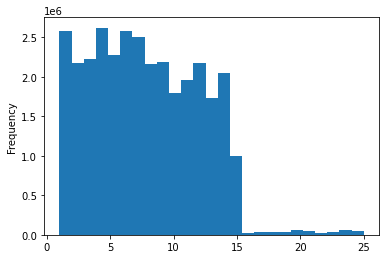

In [22]:
# Retrying histogram and defining it as an object
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

#### This displays that most products fall between 1-15 dollars

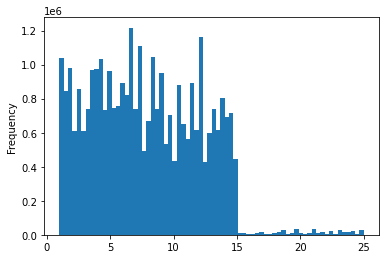

In [23]:
# Creating 2nd historgram with larger bin
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

#### Exporting our Histograms

In [24]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_bins_25.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_bins_70.png'))

## 4. Creating Line Charts

In [25]:
# Subsetting data, as we have a large data set, itll take time to compute large data
df = ords_prods_merge[:2000000]

<AxesSubplot:xlabel='orders_day_of_week', ylabel='prices'>

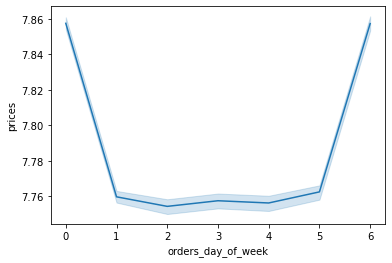

In [27]:
sns.lineplot(x = 'orders_day_of_week', y ='prices', data = ords_prods_merge)

#### This doesn't work very well as it doesn't get the full scoop of our data, only collecting the first 2 million rows

## 5. Sampling Data

In [28]:
# Creating a list holding boolean values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
# Checking the values inside 'dev'
dev

array([False,  True, False, ...,  True, False,  True])

In [33]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [34]:
# Store 40% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [35]:
# Checking to ensure our row counts equal one another
len(ords_prods_merge)

32641268

In [36]:
len(big) + len(small)

32641268

In [37]:
# Reducing our sample to the only columns we are looking for, to save on processing time
df_2 = small[['orders_day_of_week','prices']]

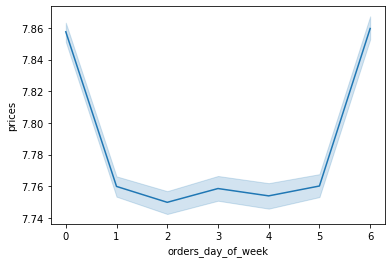

In [38]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [39]:
# Creating big dataframe 70/30 to create line chart
df_4 = ords_prods_merge[['orders_day_of_week','prices']]

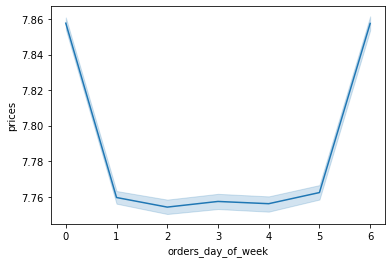

In [40]:
# Creating second line chart
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')